In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Import Datasets
df = pd.read_csv('pdb_data_seq.csv')
df1 = pd.read_csv('pdb_data_no_dups.csv')

print('Datasets have been loaded...')

Datasets have been loaded...


In [20]:
df.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [21]:
df1.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [22]:
df2 = df.set_index('structureId').merge(df1.set_index('structureId'),on='structureId',how='left')
df2.head()

,chainId,sequence,residueCount_x,macromoleculeType_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
structureId,,,,,,,,,,,,,,,,,
100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
101D,A,CGCGAATTCGCG,24,DNA,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
101D,B,CGCGAATTCGCG,24,DNA,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [23]:
# Clearing the classification column.
df2["classification"]=df2["classification"].str.replace('\n','')
df2["classification"]=df2["classification"].str.replace('\r','')
df2["classification"]=df2["classification"].str.replace('-','')
df2["classification"]=df2["classification"].str.replace(',','')
df2["classification"]=df2["classification"].str.replace('/','')
df2["classification"]=df2["classification"].str.replace(' ','')
df2["classification"]
df2['classification'].unique()
# Clearing the experimentalTechnique column.
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('\n','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('\r','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('-','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace(',','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('/','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace(' ','')
df2["experimentalTechnique"]
#df2['experimentalTechnique'].unique()

structureId
100D    XRAYDIFFRACTION
100D    XRAYDIFFRACTION
101D    XRAYDIFFRACTION
101D    XRAYDIFFRACTION
101M    XRAYDIFFRACTION
             ...       
9XIA    XRAYDIFFRACTION
9XIM    XRAYDIFFRACTION
9XIM    XRAYDIFFRACTION
9XIM    XRAYDIFFRACTION
9XIM    XRAYDIFFRACTION
Name: experimentalTechnique, Length: 471149, dtype: object

In [24]:
df2.head()

,chainId,sequence,residueCount_x,macromoleculeType_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
structureId,,,,,,,,,,,,,,,,,
100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid,DNARNAHYBRID,XRAYDIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid,DNARNAHYBRID,XRAYDIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
101D,A,CGCGAATTCGCG,24,DNA,DNA,XRAYDIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
101D,B,CGCGAATTCGCG,24,DNA,DNA,XRAYDIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGENTRANSPORT,XRAYDIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [25]:
# Drop irrelevant columns
df_cleaned = df2.drop(['publicationYear', 'chainId', 'macromoleculeType_x', 'macromoleculeType_y', 
                      'residueCount_x', 'crystallizationMethod', 'crystallizationTempK', 
                      'densityMatthews', 'densityPercentSol', 'resolution', 'residueCount_y', 
                      'experimentalTechnique'], axis=1)

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

print(df_cleaned.isnull().sum())


sequence                    0
classification              0
structureMolecularWeight    0
pdbxDetails                 0
phValue                     0
dtype: int64


In [26]:
# Get the top 10 most frequent classifications
top_10_classifications = df_cleaned['classification'].value_counts().nlargest(10)

# Display the top 10 classifications
print(top_10_classifications)


RIBOSOME                       37903
HYDROLASE                      37595
TRANSFERASE                    30427
OXIDOREDUCTASE                 29541
IMMUNESYSTEM                   12533
LYASE                          10438
HYDROLASEHYDROLASEINHIBITOR    10274
TRANSCRIPTION                   7414
TRANSPORTPROTEIN                5991
VIRALPROTEIN                    5755
Name: classification, dtype: int64


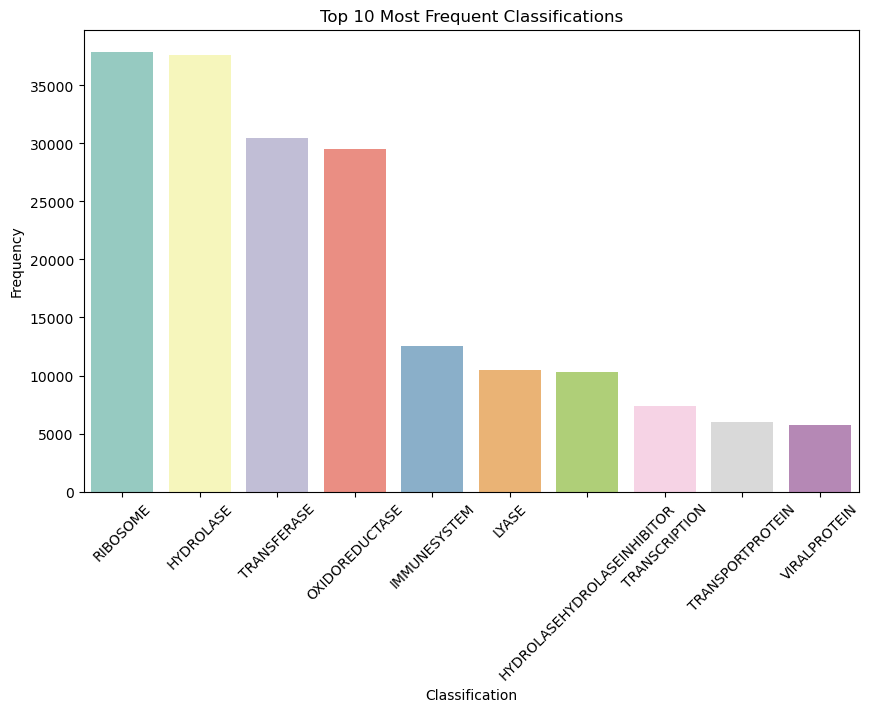

In [27]:
# Bar plot for the top 10 classifications
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_classifications.index, y=top_10_classifications.values, palette='Set3')
plt.title('Top 10 Most Frequent Classifications')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

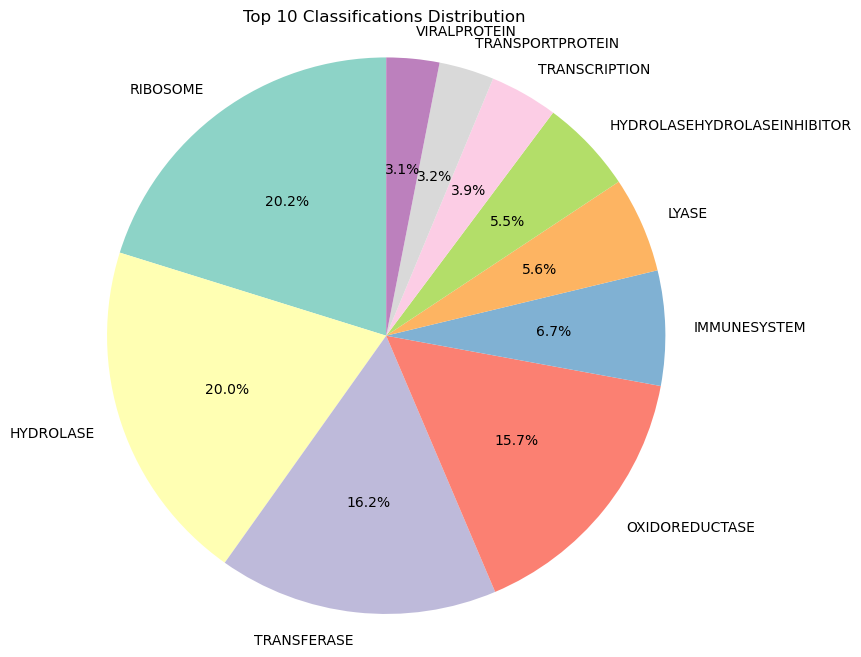

In [28]:
# Pie chart for the top 10 classifications
plt.figure(figsize=(8, 8))
plt.pie(top_10_classifications.values, labels=top_10_classifications.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', 10))
plt.title('Top 10 Classifications Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

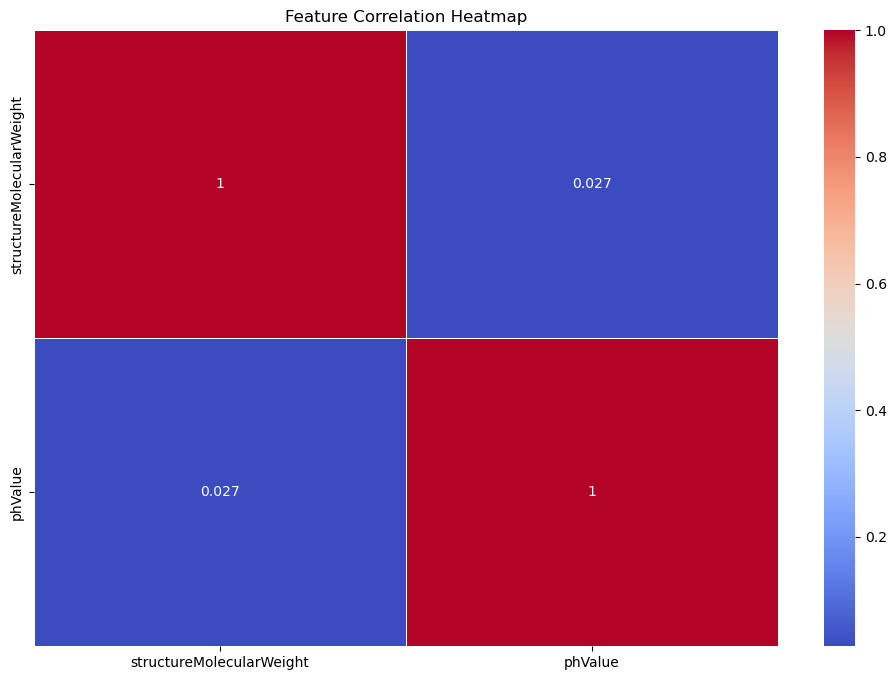

In [29]:
# Correlation heatmap for the cleaned dataset
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()